## Dependencias

## Dependencias 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## Cargar Datos

In [2]:
data = pd.read_sas('../data/churn.sas7bdat')
data.shape

(2801, 14)

In [3]:
data.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128.0,b'No',b'Yes',25.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0.0,1.0
1,107.0,b'No',b'Yes',26.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.0,2.0
2,137.0,b'No',b'No',0.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.0,3.0
3,65.0,b'No',b'No',0.0,21.95,83.0,19.42,111.0,9.40,6.0,3.43,4.0,1.0,11.0
4,168.0,b'No',b'No',0.0,21.90,71.0,8.92,128.0,6.35,2.0,3.02,1.0,0.0,13.0


## Partición

In [4]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
train.shape, valid.shape

((1960, 14), (841, 14))

## Naturaleza de variables 

In [5]:
um = ['ID']
varc = [v for v in data.columns if v[:2]=='V_']
vard = [v for v in data.columns if v[:2]=='C_']
vart = ['TARGET']
len(varc),len(vard)

(10, 2)

## Aprendizaje 

In [10]:
mod = LogisticRegression(max_iter=10000)

In [11]:
mod.fit(train[varc], train[vart[0]])

LogisticRegression(max_iter=10000)

## $\vec{\beta},\beta_0$

In [15]:
varc

['V_ACCT_LGHT',
 'V_N_VM_MESS',
 'V_T_DAY_CHG',
 'V_T_EVE_CALLS',
 'V_T_EVE_CHG',
 'V_T_NIG_CALLS',
 'V_T_NIG_CHG',
 'V_T_INT_CALLS',
 'V_T_INT_CHG',
 'V_CS_CALLS']

In [16]:
mod.coef_,mod.intercept_

(array([[ 1.82341652e-04, -2.21998380e-02,  7.20843089e-02,
          2.67934770e-04,  7.89387101e-02, -3.22511049e-04,
          6.19492306e-02, -1.51347537e-01,  3.80340198e-01,
          4.34300088e-01]]),
 array([-7.14612135]))

(array([774., 560., 291., 162.,  86.,  41.,  25.,  13.,   4.,   4.]),
 array([0.00148164, 0.08243702, 0.1633924 , 0.24434778, 0.32530316,
        0.40625855, 0.48721393, 0.56816931, 0.64912469, 0.73008007,
        0.81103545]),
 <BarContainer object of 10 artists>)

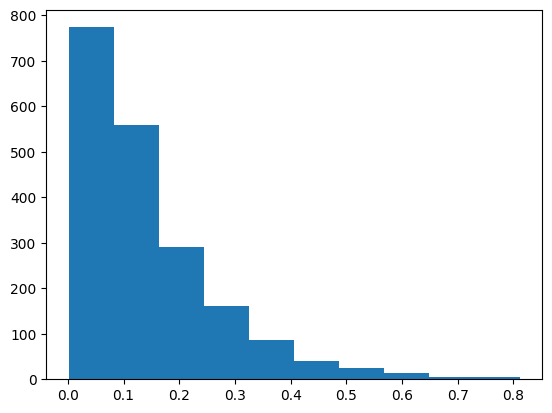

In [19]:
plt.hist(mod.predict_proba(train[varc])[:,1])

In [24]:
train['proba'] = mod.predict_proba(train[varc])[:,1]
valid['proba'] = mod.predict_proba(valid[varc])[:,1]

In [21]:
train.loc[train['proba']>=0.8].sample()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID,proba
281,88.0,b'No',b'No',0.0,51.26,72.0,21.9,118.0,5.98,2.0,3.62,4.0,1.0,2661.0,0.811035


In [22]:
print('AUC train:',roc_auc_score(train[vart[0]],mod.predict_proba(train[varc])[:,1]))
print('AUC valid:',roc_auc_score(valid[vart[0]],mod.predict_proba(valid[varc])[:,1]))

AUC train: 0.756154246498564
AUC valid: 0.7498042505592842


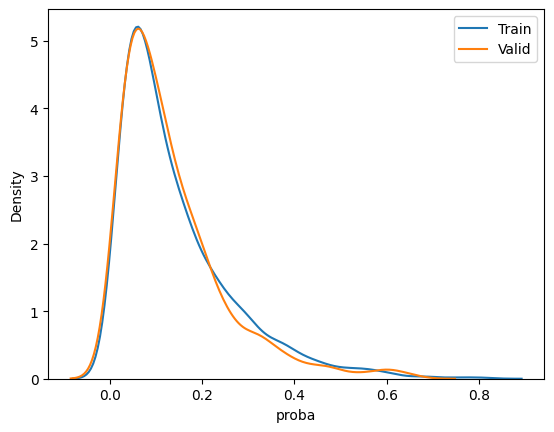

In [28]:
sns.kdeplot(train['proba'], label='Train')
sns.kdeplot(valid['proba'], label='Valid')
plt.legend()

In [34]:
train['r_proba'] =pd.cut(train['proba'], bins=np.arange(0,1.2,0.2), include_lowest=True).astype(str)
valid['r_proba'] =pd.cut(valid['proba'], bins=np.arange(0,1.2,0.2), include_lowest=True).astype(str)

In [38]:
cubo_train = train[['r_proba']+vart+um].groupby(['r_proba']+vart).count().reset_index().assign(muestra='train')
cubo_valid = valid[['r_proba']+vart+um].groupby(['r_proba']+vart).count().reset_index().assign(muestra='valid')

In [39]:
cubo = pd.concat([cubo_train,cubo_valid],ignore_index=True)

In [40]:
cubo.to_clipboard(index=False)